In [1]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-white')

from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Here the models to be tested
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#### 1. Data preparation and exploratory analysis

In [21]:
## Importing the training dataset to perform some explortatory analysis.
training = pd.read_csv("Trainingset.csv")
print(training.shape)
training.head(10)

(1000, 9)


,Unnamed: 0,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
0,53369,39.381426,18.862292,35.527769,-0.447984,35.357707,5.5,0.036513,True
1,182009,26.649803,23.902034,25.035602,-0.138960,13.677998,5.5,0.026517,False
2,95707,38.088840,19.150485,37.676668,-0.429194,33.888961,5.5,0.043123,True
3,449346,38.118073,17.925782,37.875329,-0.412705,33.750390,5.5,-0.017076,True
4,292414,38.412099,16.631370,30.774217,-0.442670,34.340077,5.5,-0.002722,True
5,38215,49.776801,22.076942,23.693891,-0.918304,47.813874,5.5,0.077292,False
6,25925,38.333064,16.146603,33.834127,-0.445739,34.289073,5.5,0.031736,True
7,340630,40.031302,15.837696,44.779172,-0.400196,35.527106,5.5,0.057334,True
8,364434,NaN,15.685709,35.054909,-0.499235,46.789286,5.5,0.085738,False
9,107275,49.086742,20.537319,37.154088,-1.402519,51.872367,0.5,0.043466,False


In [22]:
training.rename(columns={"Unnamed: 0": "id"}, inplace=True)
training.set_index('id', inplace=True)
training.sort_index(axis=0, inplace=True)
## Filling the NAs with -99999 to train the classifier into a significant outlier
training.fillna(value=-99999, inplace=True)
training.head(10)

,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
id,,,,,,,,
11860,15.724467,17.425718,18.561641,-0.161059,4.532523,5.500000,0.025464,False
14709,38.661613,16.055593,35.247591,-0.416284,34.331482,5.500000,0.043825,True
14710,39.099561,19.862337,41.030647,-0.412824,34.733139,5.500000,0.055549,True
14735,-99999.000000,17.620658,38.399913,-0.400809,48.399249,5.500000,0.019397,False
14736,48.494417,21.716524,38.296494,-0.629313,48.006664,2.340075,0.049645,False
14738,18.851078,18.856889,21.200125,-0.183792,9.043452,5.500000,0.071017,False
15079,47.439514,21.967005,39.515621,-0.897198,48.767030,1.166117,0.016133,False
15081,-99999.000000,17.805129,33.612546,-0.909044,60.000000,0.500000,0.009270,False
15091,47.293011,16.084766,35.305180,-0.416431,42.964410,5.500000,0.083140,False


In [23]:
training.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-18069.398525,18.393905,38.119705,-0.456405,34.684044,4.364607,0.037798
std,38535.007382,5.055759,46.755192,0.360630,13.699149,1.875227,0.050050
min,-99999.000000,-74.319376,11.268420,-4.564430,0.000000,0.500000,-0.355829
25%,19.041683,16.261901,23.445959,-0.471023,33.747544,3.224358,0.019646
50%,38.298845,18.518176,33.919381,-0.427451,34.728658,5.500000,0.035941
75%,39.775512,21.003851,40.241479,-0.317529,44.688536,5.500000,0.060591
max,49.982774,29.108979,741.077662,-0.010000,60.000000,5.500000,0.244130


#### 2. Split-out Validation dataset

In [24]:
# Spliting the dataset into the labels and predictor
X = training.drop('CurveCall', axis=1)
y = training['CurveCall']

# First Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 28)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state= 28)

print("The size of X to train the model is:", X_train.shape)
print("The size of X to test the model is:", X_test.shape)
print("The size of X to validate the is:", X_valid.shape)

print("The size of y to train the model is:", y_train.shape)
print("The size of y to test the model is:", y_test.shape)
print("The size of y to validate the model is:", y_valid.shape)

The size of X to train the model is: (720, 7)
The size of X to test the model is: (200, 7)
The size of X to validate the is: (80, 7)
The size of y to train the model is: (720,)
The size of y to test the model is: (200,)
The size of y to validate the model is: (80,)


#### 3. Model algorithms trial

In [25]:
# Testing options and evaluation metric
random_seed = 31
scoring = 'accuracy'

# This process will be run as follows:
# 1. Create an empty list to be populated with the different classification models
models_to_test = []
models_to_test.append(('LR', LogisticRegression(max_iter=1000)))
models_to_test.append(('LDA', LinearDiscriminantAnalysis()))
models_to_test.append(('KNN', KNeighborsClassifier()))
models_to_test.append(('CART', DecisionTreeClassifier()))
models_to_test.append(('NB', GaussianNB()))
models_to_test.append(('SVM', SVC()))

print(models_to_test)
print("")
# 2. Create a for loop to evaluate the models in each run and store the results.
results = []
names = []

for name, model in models_to_test:
    kfold = model_selection.KFold(n_splits=10, random_state=random_seed, shuffle=True)
    cross_val_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cross_val_results)
    names.append(name)
    
    msg = "The %s model: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(msg)

[('LR', LogisticRegression(max_iter=1000)), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC())]

The LR model: 0.941667 (0.026206)
The LDA model: 0.806944 (0.035924)
The KNN model: 0.991667 (0.011111)
The CART model: 0.976389 (0.018686)
The NB model: 0.984722 (0.013103)
The SVM model: 0.630556 (0.058663)


<Figure size 432x288 with 0 Axes>

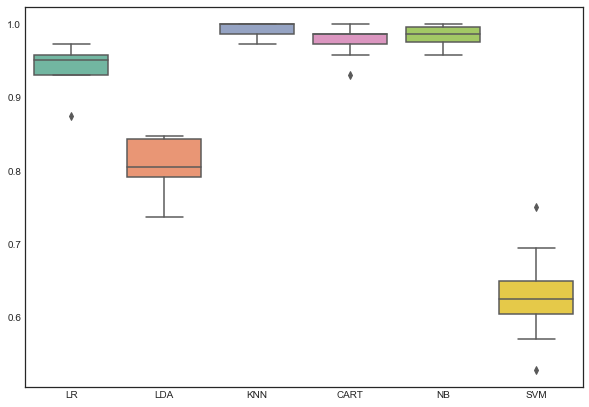

In [26]:
# 3. Comparing model algorithms
figure = plt.figure()
plt.figure(figsize=(10, 7))

figure.suptitle("Model Comparison")
ax = sns.boxplot(x=names, y=results, palette = 'Set2')
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [27]:
results

[array([0.93055556, 0.95833333, 0.875     , 0.95833333, 0.95833333,
        0.93055556, 0.93055556, 0.94444444, 0.95833333, 0.97222222]),
 array([0.80555556, 0.79166667, 0.80555556, 0.84722222, 0.84722222,
        0.73611111, 0.76388889, 0.83333333, 0.79166667, 0.84722222]),
 array([1.        , 1.        , 0.98611111, 0.97222222, 1.        ,
        1.        , 1.        , 0.98611111, 0.97222222, 1.        ]),
 array([1.        , 0.98611111, 0.93055556, 0.97222222, 0.98611111,
        0.98611111, 0.95833333, 0.98611111, 0.97222222, 0.98611111]),
 array([0.98611111, 0.98611111, 0.98611111, 0.97222222, 1.        ,
        0.98611111, 1.        , 0.97222222, 0.95833333, 1.        ]),
 array([0.56944444, 0.65277778, 0.625     , 0.63888889, 0.69444444,
        0.625     , 0.52777778, 0.625     , 0.59722222, 0.75      ])]

In [28]:
## Importing the training dataset to perform some explortatory analysis.
training = pd.read_csv("Trainingset.csv")
print(training.shape)
training.head(10)

(1000, 9)


,Unnamed: 0,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
0,53369,39.381426,18.862292,35.527769,-0.447984,35.357707,5.5,0.036513,True
1,182009,26.649803,23.902034,25.035602,-0.138960,13.677998,5.5,0.026517,False
2,95707,38.088840,19.150485,37.676668,-0.429194,33.888961,5.5,0.043123,True
3,449346,38.118073,17.925782,37.875329,-0.412705,33.750390,5.5,-0.017076,True
4,292414,38.412099,16.631370,30.774217,-0.442670,34.340077,5.5,-0.002722,True
5,38215,49.776801,22.076942,23.693891,-0.918304,47.813874,5.5,0.077292,False
6,25925,38.333064,16.146603,33.834127,-0.445739,34.289073,5.5,0.031736,True
7,340630,40.031302,15.837696,44.779172,-0.400196,35.527106,5.5,0.057334,True
8,364434,NaN,15.685709,35.054909,-0.499235,46.789286,5.5,0.085738,False
9,107275,49.086742,20.537319,37.154088,-1.402519,51.872367,0.5,0.043466,False


In [29]:
training.rename(columns={"Unnamed: 0": "id"}, inplace=True)
training.set_index('id', inplace=True)
training.sort_index(axis=0, inplace=True)
## Filling the NAs with -99999 to train the classifier into a significant outlier
training.fillna(value=-99999, inplace=True)
training.head(10)

,cq,baseline,plateau,slope,inflection,asymmetry,drift,CurveCall
id,,,,,,,,
11860,15.724467,17.425718,18.561641,-0.161059,4.532523,5.500000,0.025464,False
14709,38.661613,16.055593,35.247591,-0.416284,34.331482,5.500000,0.043825,True
14710,39.099561,19.862337,41.030647,-0.412824,34.733139,5.500000,0.055549,True
14735,-99999.000000,17.620658,38.399913,-0.400809,48.399249,5.500000,0.019397,False
14736,48.494417,21.716524,38.296494,-0.629313,48.006664,2.340075,0.049645,False
14738,18.851078,18.856889,21.200125,-0.183792,9.043452,5.500000,0.071017,False
15079,47.439514,21.967005,39.515621,-0.897198,48.767030,1.166117,0.016133,False
15081,-99999.000000,17.805129,33.612546,-0.909044,60.000000,0.500000,0.009270,False
15091,47.293011,16.084766,35.305180,-0.416431,42.964410,5.500000,0.083140,False


In [30]:
training.describe()

,cq,baseline,plateau,slope,inflection,asymmetry,drift
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-18069.398525,18.393905,38.119705,-0.456405,34.684044,4.364607,0.037798
std,38535.007382,5.055759,46.755192,0.360630,13.699149,1.875227,0.050050
min,-99999.000000,-74.319376,11.268420,-4.564430,0.000000,0.500000,-0.355829
25%,19.041683,16.261901,23.445959,-0.471023,33.747544,3.224358,0.019646
50%,38.298845,18.518176,33.919381,-0.427451,34.728658,5.500000,0.035941
75%,39.775512,21.003851,40.241479,-0.317529,44.688536,5.500000,0.060591
max,49.982774,29.108979,741.077662,-0.010000,60.000000,5.500000,0.244130


#### 2. Split-out Validation dataset

In [31]:
# Spliting the dataset into the labels and predictor
X = training.drop('CurveCall', axis=1)
y = training['CurveCall']

# First Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 28)

# Second one
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size = 0.9, test_size=0.1, random_state= 28)

print("The size of X to train the model is:", X_train.shape)
print("The size of X to test the model is:", X_test.shape)
print("The size of X to validate the is:", X_valid.shape)

print("The size of y to train the model is:", y_train.shape)
print("The size of y to test the model is:", y_test.shape)
print("The size of y to validate the model is:", y_valid.shape)

The size of X to train the model is: (720, 7)
The size of X to test the model is: (200, 7)
The size of X to validate the is: (80, 7)
The size of y to train the model is: (720,)
The size of y to test the model is: (200,)
The size of y to validate the model is: (80,)


#### 3. Model algorithms trial

In [32]:
# Testing options and evaluation metric
random_seed = 31
scoring = 'accuracy'

# This process will be run as follows:
# 1. Create an empty list to be populated with the different classification models
models_to_test = []
models_to_test.append(('LR', LogisticRegression(max_iter=1000)))
models_to_test.append(('LDA', LinearDiscriminantAnalysis()))
models_to_test.append(('KNN', KNeighborsClassifier()))
models_to_test.append(('CART', DecisionTreeClassifier()))
models_to_test.append(('NB', GaussianNB()))
models_to_test.append(('SVM', SVC()))

print(models_to_test)
print("")
# 2. Create a for loop to evaluate the models in each run and store the results.
results = []
names = []

for name, model in models_to_test:
    kfold = model_selection.KFold(n_splits=10, random_state=random_seed, shuffle=True)
    cross_val_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cross_val_results)
    names.append(name)
    
    msg = "The %s model: %f (%f)" % (name, cross_val_results.mean(), cross_val_results.std())
    print(msg)

[('LR', LogisticRegression(max_iter=1000)), ('LDA', LinearDiscriminantAnalysis()), ('KNN', KNeighborsClassifier()), ('CART', DecisionTreeClassifier()), ('NB', GaussianNB()), ('SVM', SVC())]

The LR model: 0.941667 (0.026206)
The LDA model: 0.806944 (0.035924)
The KNN model: 0.991667 (0.011111)
The CART model: 0.981944 (0.010848)
The NB model: 0.984722 (0.013103)
The SVM model: 0.630556 (0.058663)


<Figure size 432x288 with 0 Axes>

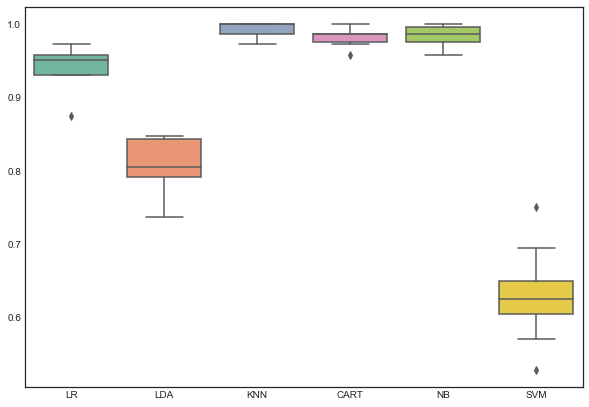

In [33]:
# 3. Comparing model algorithms
figure = plt.figure()
plt.figure(figsize=(10, 7))

figure.suptitle("Model Comparison")
ax = sns.boxplot(x=names, y=results, palette = 'Set2')
#plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

#### 4. Run the model with the higher predictive Value

In [34]:
# Make predictions on test dataset
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)

# Accuracy on Train
print("The Training Accuracy is: ", knn.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", knn.score(X_test, y_test))
print(" ")

# print(accuracy_score(y_train, y_pred))
# print(confusion_matrix(y_train, y_pred))
print(classification_report(y_train, y_pred))

The Training Accuracy is:  0.9930555555555556
The Testing Accuracy is:  0.985
 
              precision    recall  f1-score   support

       False       0.99      1.00      0.99       402
        True       0.99      0.99      0.99       318

    accuracy                           0.99       720
   macro avg       0.99      0.99      0.99       720
weighted avg       0.99      0.99      0.99       720



In [46]:
## Creating a confusion Matrix
def plot_confusion_matrices(cm, classes=None, title='Confusion Matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="YlGnBu", xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

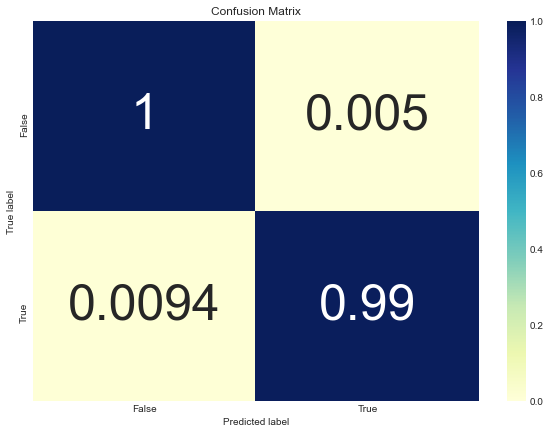

In [47]:
## Visualization
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1, 1)

plt.figure(figsize=(10, 7))
plot_confusion_matrices(cm_norm, classes=knn.classes_)

#### 5. Use the model seleced (KNN) on the unseen dataset. 


In [48]:
import pickle
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [49]:
## Saving the model into a file.
model_file = 'knn_model.sav'
pickle.dump(knn_model, open(model_file, 'wb'))

In [50]:
# Loading the model to use it on new predictions.
knn_loaded = pickle.load(open(model_file, 'rb'))
validation_result = knn_loaded.score(X_test, y_test)
print(validation_result)

0.985


In [51]:
# Load test dataset
final_predict = pd.read_csv("Validationset.csv")
final_predict.rename(columns={"Unnamed: 0": "id"}, inplace=True)
final_predict.set_index('id', inplace=True)
final_predict.sort_index(axis=0, inplace=True)
final_predict

,cq,baseline,plateau,slope,inflection,asymmetry,drift
id,,,,,,,
14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420
15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419
15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256
15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288
19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527
...,...,...,...,...,...,...,...
434796,NaN,-78.751009,76.641007,-0.022739,48.327875,0.500000,-0.427222
434803,NaN,11.579685,13.363196,-0.074373,0.000000,1.094165,0.021720
441197,45.545784,12.174307,22.971063,-1.014011,48.080364,0.715661,0.010067


In [52]:
final_predict = final_predict.fillna(value=-99999)
final_predict

,cq,baseline,plateau,slope,inflection,asymmetry,drift
id,,,,,,,
14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420
15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419
15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256
15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288
19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527
...,...,...,...,...,...,...,...
434796,-99999.000000,-78.751009,76.641007,-0.022739,48.327875,0.500000,-0.427222
434803,-99999.000000,11.579685,13.363196,-0.074373,0.000000,1.094165,0.021720
441197,45.545784,12.174307,22.971063,-1.014011,48.080364,0.715661,0.010067


In [53]:
predictions = knn_loaded.predict(final_predict)
print(predictions)
print(len(predictions))

[ True False False False  True False False False False False  True False
  True False  True False  True  True  True  True False False  True  True
  True  True  True  True  True False False  True  True  True False  True
  True False  True False False  True  True False False  True False False
 False  True False False  True  True  True False  True False False False
  True  True False False  True False False False  True  True False False
  True  True False  True  True  True  True False  True  True  True False
  True  True  True False False False False False False False False False
 False False  True False]
100


In [54]:
# Converting the predictions into a dataframe
predictions_dataframe = pd.DataFrame(data=predictions, columns = ['knn_CurveCall'])
predictions_dataframe

,knn_CurveCall
0,True
1,False
2,False
3,False
4,True
...,...
95,False
96,False
97,False
98,True


In [55]:
test = final_predict.reset_index()
test

,id,cq,baseline,plateau,slope,inflection,asymmetry,drift
0,14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420
1,15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419
2,15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256
3,15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288
4,19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527
...,...,...,...,...,...,...,...,...
95,434796,-99999.000000,-78.751009,76.641007,-0.022739,48.327875,0.500000,-0.427222
96,434803,-99999.000000,11.579685,13.363196,-0.074373,0.000000,1.094165,0.021720
97,441197,45.545784,12.174307,22.971063,-1.014011,48.080364,0.715661,0.010067
98,441277,38.879085,14.864933,38.677119,-0.421525,34.602799,5.500000,0.125165


In [56]:
final_predicted_result = pd.concat([test, predictions_dataframe], axis=1)
final_predicted_result.set_index('id', inplace=True)
final_predicted_result.head(50)

,cq,baseline,plateau,slope,inflection,asymmetry,drift,knn_CurveCall
id,,,,,,,,
14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420,True
15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419,False
15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256,False
15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288,False
19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527,True
22820,-99999.000000,18.888563,19.609940,-1.409191,60.000000,1.962613,0.029871,False
22946,4.195355,13.469611,24.290020,-0.103122,42.081386,0.500000,-0.084263,False
24796,-99999.000000,27.130949,28.231847,-0.010000,41.080019,1.081497,0.058651,False
24848,-99999.000000,20.365615,25.773975,-0.349360,46.356817,5.500000,0.014776,False


<AxesSubplot:xlabel='knn_CurveCall', ylabel='count'>

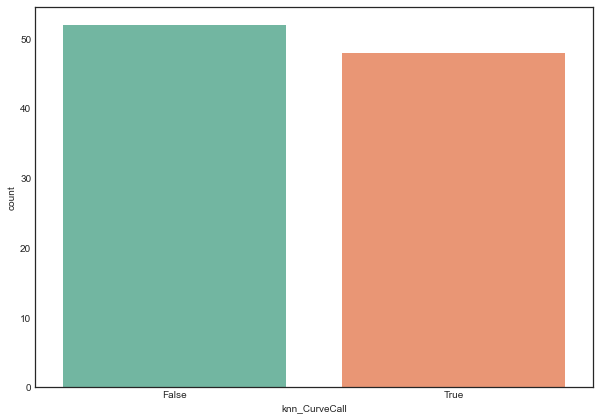

In [57]:
# Checking the distribution between outcomes in the variable to be predicted (curve call).
# An overall similar ration between True/False are observed.
plt.figure(figsize=(10, 7))
sns.countplot(x = 'knn_CurveCall', data = final_predicted_result, palette = 'Set2')

In [58]:
log_reg_predictions = pd.read_csv('logistic_regression_predictions.csv', sep=',', index_col='id')
log_reg_predictions

,cq,baseline,plateau,slope,inflection,asymmetry,drift,predicted_CurveCall
id,,,,,,,,
14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420,True
15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419,False
15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256,False
15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288,True
19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527,True
...,...,...,...,...,...,...,...,...
434796,-99999.000000,-78.751009,76.641007,-0.022739,48.327875,0.500000,-0.427222,False
434803,-99999.000000,11.579685,13.363196,-0.074373,0.000000,1.094165,0.021720,False
441197,45.545784,12.174307,22.971063,-1.014011,48.080364,0.715661,0.010067,False


In [59]:
merged_results = pd.merge(log_reg_predictions, 
                          final_predicted_result, 
                          on=['id'],
                         how='inner')

In [60]:
print(merged_results.shape)
merged_results = merged_results[['cq_x', 'baseline_x', 'plateau_x', 'slope_x', 'inflection_x', 'asymmetry_x', 'drift_x', 'predicted_CurveCall', 'knn_CurveCall']]
merged_results.rename(columns={"cq_x": "cq", "baseline_x": "baseline", 'plateau_x': 'plateau', "slope_x":'slope', 'inflection_x':'inflection', 'asymmetry_x':'asymmetry','drift_x':'drift'}, inplace=True)
merged_results

(100, 16)


,cq,baseline,plateau,slope,inflection,asymmetry,drift,predicted_CurveCall,knn_CurveCall
id,,,,,,,,,
14726,38.670836,11.885578,26.926569,-0.404163,34.210850,5.500000,0.047420,True,True
15107,22.874179,21.445045,22.434226,-0.157883,14.922006,3.962626,0.034419,False,False
15122,24.355958,22.148880,24.057369,-0.176038,14.116340,5.500000,0.027256,False,False
15137,44.767309,19.613494,41.719725,-0.479926,41.011392,5.500000,0.038288,True,False
19946,38.412793,18.993733,42.965284,-0.412675,34.044800,5.500000,0.065527,True,True
...,...,...,...,...,...,...,...,...,...
434796,-99999.000000,-78.751009,76.641007,-0.022739,48.327875,0.500000,-0.427222,False,False
434803,-99999.000000,11.579685,13.363196,-0.074373,0.000000,1.094165,0.021720,False,False
441197,45.545784,12.174307,22.971063,-1.014011,48.080364,0.715661,0.010067,False,False


In [63]:
merged_results.to_csv('predictions_comparison.csv', sep=',')
final_predicted_result.to_csv('knn_predictions.csv', sep=',')

In [66]:
merged_results.to_excel('predictions_comparison.xlsx', sheet_name='Sheet_name_1')
final_predicted_result.to_excel('knn_predictions.xlsx', sheet_name='Sheet_name_1')
log_reg_predictions.to_excel('logistic_regression_predictions.xlsx', sheet_name='Sheet_name_1')